No saved model found. Starting training from scratch.
training_loss:0.8921,71.5883
training_loss:0.5106,81.9267
training_loss:0.4578,83.8900
training_loss:0.4293,84.7700
training_loss:0.4101,85.5083
training_loss:0.3956,86.0250
training_loss:0.3830,86.4650
training_loss:0.3729,86.7567
training_loss:0.3649,87.0167
training_loss:0.3572,87.2583
training_loss:0.3493,87.5583
training_loss:0.3433,87.7367
Model saved to fashion_mnist_model.pth
(28, 28, 1)


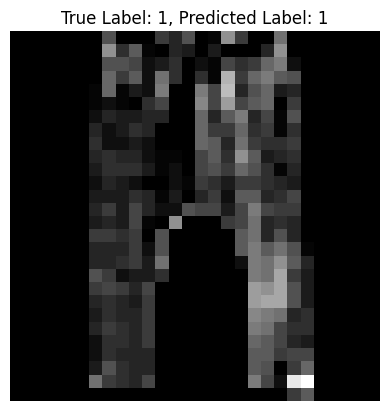

In [9]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as func
from torch import nn
from torchvision import datasets, transforms
import random
import os
 
transform1 = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))]) 
training_dataset = datasets.FashionMNIST(root='./data', train= True, download = True, transform = transform1) 
training_loader = torch.utils.data.DataLoader(dataset = training_dataset, batch_size = 100, shuffle = True)

def im_convert(tensor): 
    image = tensor.clone().detach().numpy() 
    image = image.transpose(1,2,0) 
    print(image.shape) 
    image = image*(np.array((0.5,0.5,0.5))+np.array((0.5,0.5,0.5))) 
    image = image.clip(0,1) 
    return image

def save_model(model, filename='fashion_mnist_model.pth'):
    torch.save(model.state_dict(), filename)
    print(f'Model saved to {filename}')

def load_model(model, filename='fashion_mnist_model.pth'):
    model.load_state_dict(torch.load(filename, weights_only = True))
    model.eval()
    print(f'Model loaded from {filename}')

class classification1(nn.Module): 
    def __init__(self,input_layer, hidden_layer1, hidden_layer2, output_layer): 
        super().__init__() 
        self.linear1 = nn.Linear(input_layer, hidden_layer1)
        self.linear2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.linear3 = nn.Linear(hidden_layer2, output_layer)

    def forward(self,x): 
        x = func.relu(self.linear1(x)) 
        x = func.relu(self.linear2(x)) 
        x = self.linear3(x) 
        return x 
    
model = classification1(784,125,65,10) 
criteron = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(model.parameters(),lr=0.0001) 
epochs = 12 
loss_history = [] 
correct_history = [] 

if os.path.exists('fashion_mnist_model.pth'):
    load_model(model)
else:
    print("No saved model found. Starting training from scratch.")

for e in range(epochs): 
    loss = 0.0 
    correct = 0.0 
    for input,labels in training_loader: 
        inputs = input.view(input.shape[0],-1) 
        outputs = model(inputs) 
        loss1 = criteron(outputs, labels) 
        optimizer.zero_grad() 
        loss1.backward() 
        optimizer.step() 
        _,preds = torch.max(outputs,1) 
        loss += loss1.item() 
        correct += torch.sum(preds==labels.data)
    else:
        epoch_loss = loss/len(training_loader) 
        epoch_acc = correct.float()/len(training_loader) 
        loss_history.append(epoch_loss) 
        correct_history.append(epoch_acc) 
        print('training_loss:{:.4f},{:.4f}'.format(epoch_loss, epoch_acc.item()))

save_model(model)

dataiter = iter(training_loader)
images, labels = next(dataiter)

random_index = random.randint(0, len(images) - 1)

random_image = images[random_index]
true_label = labels[random_index].item()

random_image = random_image.view(1, 784)

with torch.no_grad():
    output = model(random_image)
    _, predicted_label = torch.max(output, 1)

# Визуализация изображения и вывод предсказанной метки
plt.imshow(im_convert(images[random_index]), cmap='gray')
plt.title(f'True Label: {true_label}, Predicted Label: {predicted_label.item()}')
plt.axis('off')
plt.show()
